In [8]:
! pip install seaborn

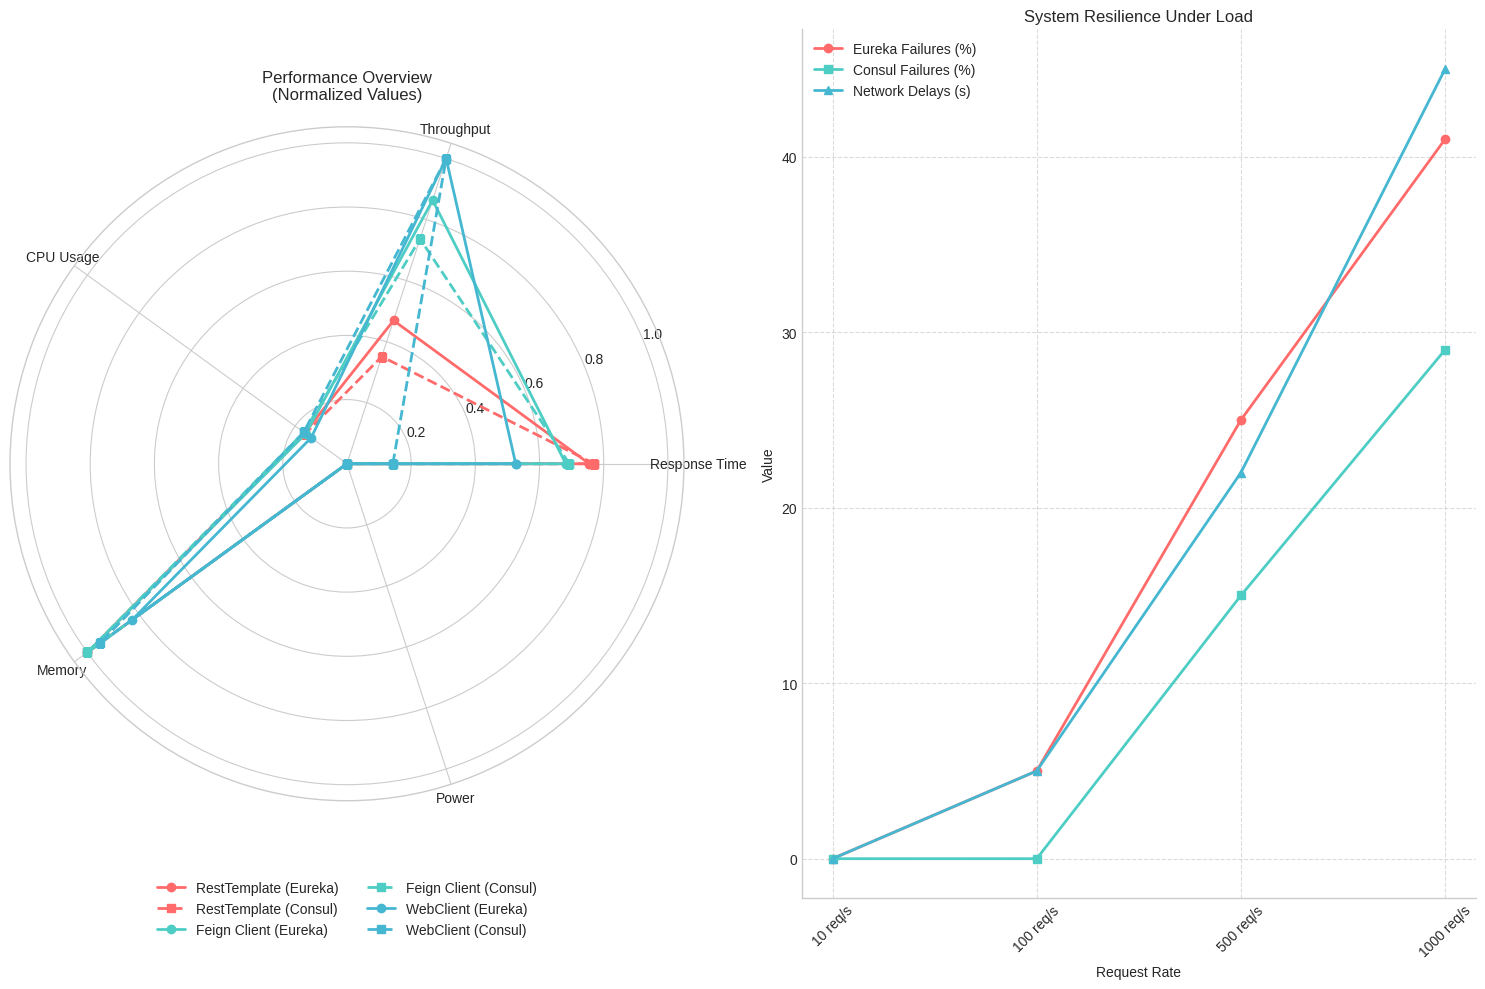

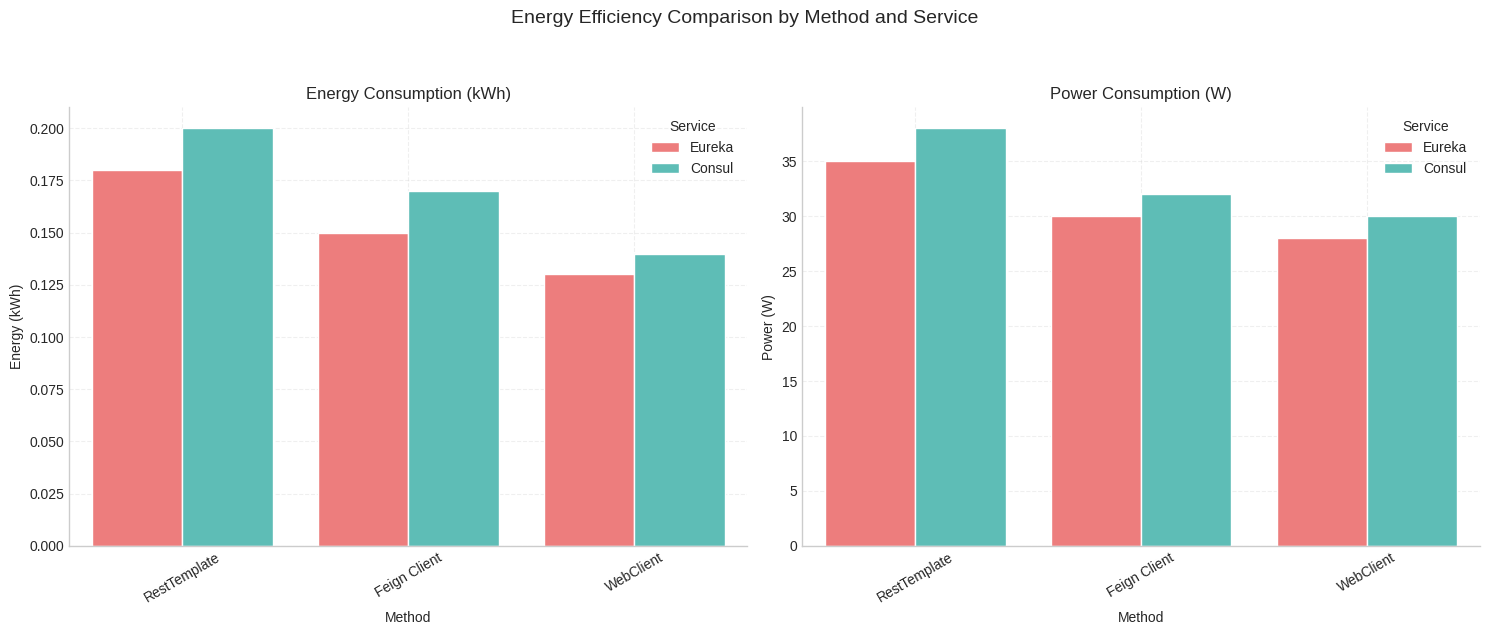

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set basic style parameters without using style presets
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# Prepare the data
performance_data = {
    'Method': ['RestTemplate', 'Feign Client', 'WebClient'] * 2,
    'Service': ['Eureka'] * 3 + ['Consul'] * 3,
    'Response Time (ms)': [220, 180, 150, 240, 190, 60],
    'Throughput (req/s)': [150, 220, 260, 130, 200, 240],
    'CPU (%)': [75, 65, 60, 80, 70, 65],
    'Memory (MB)': [280, 250, 220, 300, 260, 230],
    'Power (W)': [35, 30, 28, 38, 32, 30],
    'Energy (kWh)': [0.18, 0.15, 0.13, 0.20, 0.17, 0.14]
}
df = pd.DataFrame(performance_data)

# Create figure for main visualizations
fig = plt.figure(figsize=(15, 10))

# Plot 1: Spider/Radar Chart
categories = ['Response Time', 'Throughput', 'CPU Usage', 'Memory', 'Power']
methods = ['RestTemplate', 'Feign Client', 'WebClient']

# Prepare data for radar chart
values_eureka = [
    df[df['Service'] == 'Eureka']['Response Time (ms)'].values,
    df[df['Service'] == 'Eureka']['Throughput (req/s)'].values,
    df[df['Service'] == 'Eureka']['CPU (%)'].values,
    df[df['Service'] == 'Eureka']['Memory (MB)'].values,
    df[df['Service'] == 'Eureka']['Power (W)'].values
]

values_consul = [
    df[df['Service'] == 'Consul']['Response Time (ms)'].values,
    df[df['Service'] == 'Consul']['Throughput (req/s)'].values,
    df[df['Service'] == 'Consul']['CPU (%)'].values,
    df[df['Service'] == 'Consul']['Memory (MB)'].values,
    df[df['Service'] == 'Consul']['Power (W)'].values
]

def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Spider/Radar Chart
ax1 = plt.subplot(121, polar=True)
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for i, method in enumerate(methods):
    values_e = normalize([v[i] for v in values_eureka])
    values_c = normalize([v[i] for v in values_consul])

    values_e = np.concatenate((values_e, [values_e[0]]))
    values_c = np.concatenate((values_c, [values_c[0]]))

    ax1.plot(angles, values_e, 'o-', color=colors[i], linewidth=2,
             label=f'{method} (Eureka)')
    ax1.plot(angles, values_c, 's--', color=colors[i], linewidth=2,
             label=f'{method} (Consul)')

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories)
ax1.set_title('Performance Overview\n(Normalized Values)', pad=20)
ax1.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=2)

# Plot 2: Resilience Lines
ax2 = plt.subplot(122)
failure_data = {
    'Request Rate': ['10 req/s', '100 req/s', '500 req/s', '1000 req/s'],
    'Eureka Failures': [0, 5, 25, 41],
    'Consul Failures': [0, 0, 15, 29],
    'Network Delays (s)': [0, 5, 22, 45]
}
failure_df = pd.DataFrame(failure_data)

ax2.plot(failure_df['Request Rate'], failure_df['Eureka Failures'],
         'o-', color='#FF6B6B', label='Eureka Failures (%)', linewidth=2)
ax2.plot(failure_df['Request Rate'], failure_df['Consul Failures'],
         's-', color='#4ECDC4', label='Consul Failures (%)', linewidth=2)
ax2.plot(failure_df['Request Rate'], failure_df['Network Delays (s)'],
         '^-', color='#45B7D1', label='Network Delays (s)', linewidth=2)

ax2.set_xlabel('Request Rate')
ax2.set_ylabel('Value')
ax2.set_title('System Resilience Under Load')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Energy Efficiency Plot with separated subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Energy (kWh) comparison
sns.barplot(data=df, x='Method', y='Energy (kWh)', hue='Service',
            palette=['#FF6B6B', '#4ECDC4'], ax=ax1)
ax1.set_title('Energy Consumption (kWh)')
ax1.set_xlabel('Method')
ax1.set_ylabel('Energy (kWh)')
ax1.tick_params(axis='x', rotation=30)
ax1.grid(True, linestyle='--', alpha=0.3)

# Plot Power (W) comparison
sns.barplot(data=df, x='Method', y='Power (W)', hue='Service',
            palette=['#FF6B6B', '#4ECDC4'], ax=ax2)
ax2.set_title('Power Consumption (W)')
ax2.set_xlabel('Method')
ax2.set_ylabel('Power (W)')
ax2.tick_params(axis='x', rotation=30)
ax2.grid(True, linestyle='--', alpha=0.3)

# Add a main title
plt.suptitle('Energy Efficiency Comparison by Method and Service',
             fontsize=14, y=1.05)

plt.tight_layout()
plt.show()